Final Project Submission

Please fill out:
* Student name: Sung Bae
* Student pace: online full time
* Scheduled project review date/time: 08/13/2020
* Instructor name: James Irving
* Blog post URL: 


In [1117]:
# Your code here - remember to use markdown cells for comments as well!

'/Users/juhyunlee/Documents/GitHub/dsc-mod-1-project-v2-1-onl01-dtsc-ft-070620'

# Introduction to the Project

## Introduction
Over the century, the film industry have been exponentially growing not only in the developed countries, but also developing countries as well making.

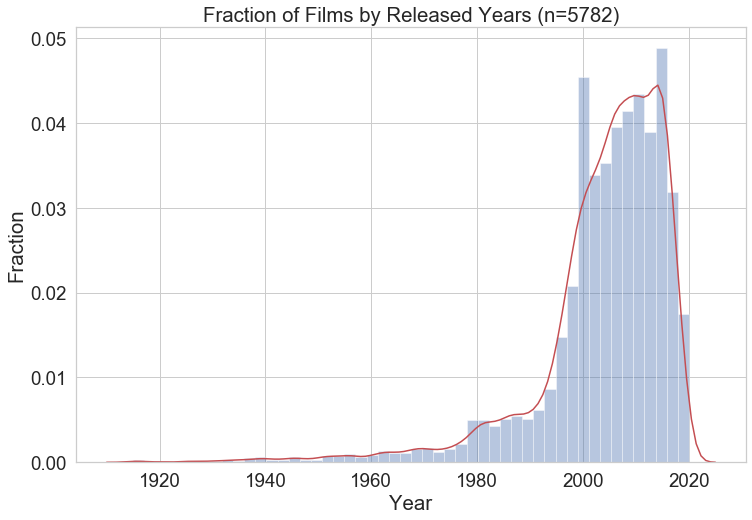

In [269]:
# seaborn style settings
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
sns.distplot(df_movie_budgets['year'], ax=ax, 
             color='b',
             kde_kws={'color':'r'});
ax.set(xlabel='Year', ylabel='Fraction', 
       title=f'Fraction of Films by Released Years (n={len(df_movie_budgets)})');

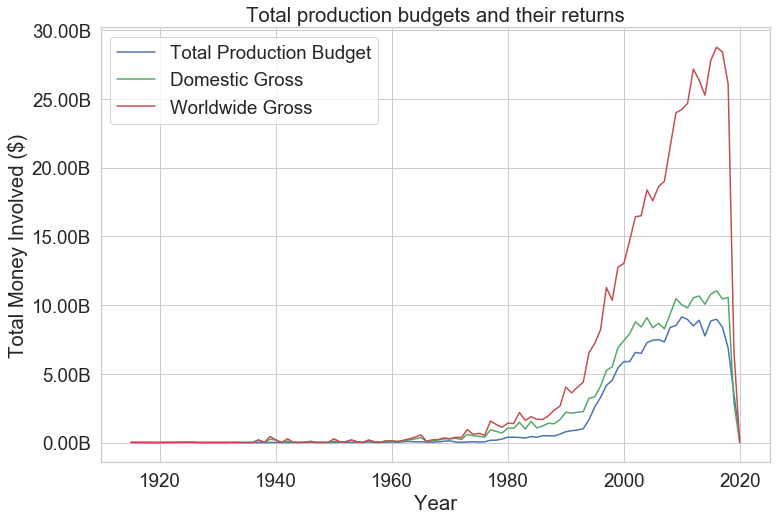

In [295]:
# seaborn style settings
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
sns.lineplot(x='year', 
             y='production_budget',
             data=group_budgets,)
sns.lineplot(x='year', 
             y='domestic_gross',
             color='g',
             data=group_budgets)
sns.lineplot(x='year', 
             y='worldwide_gross',
             color='r',
             data=group_budgets)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in ax.get_yticks()/1000000000];
ax.set_yticklabels(ylabels);
ax.set(title='Total production budgets and their returns',
       xlabel='Year',
       ylabel='Total Money Involved ($)');

ax.legend(loc='upper left', labels=['Total Production Budget', 'Domestic Gross', 'Worldwide Gross'])
# source code: https://stackoverflow.com/questions/45201514/edit-seaborn-legend/45211976

## Problem Statement
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what ```type of films are currently doing the best at the box office```. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

### Defining the "best".
There are multiple ways to measure "best"ness of films but they boil down to is the film "profitable" financially and non-financially. So we will consider the following catergories:
* Return on investment (ROI)
    - Higher ROI in domestic revenue rather than international revenue.
    - "But generally, domestic revenue seems to be be better for studios than overseas revenue, because the studios take a bigger cut of domestic revenue." (https://io9.gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305)
* Rating by non-critics
    - 
* Nominations film awards

### What makes a film company a "successful" film company in the industry?

## Data Set
You may scrape or make API calls to get additional data, but included in the repository (in the folder zippedData) is some movie-related data from:

* Box Office Mojo
* IMDB
* Rotten Tomatoes
* TheMovieDB.org


## 4 Questions to be answered
* Which Genre(s) produced highest rating?
* Which Genre(s) produced maximum ROI?
* How much money should be invested
* Which region of the world should be our focus target?

# EDA

## Importing and storing data

### Importing Libraries

In [943]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os
import scipy.stats as stats
%matplotlib inline
# Setting up font size for seaborn plots
sns.set(font_scale=1.7)

In [6]:
%pwd

'/Users/juhyunlee/Documents/GitHub/dsc-mod-1-project-v2-1-onl01-dtsc-ft-070620'

### Importing datasets into dataframe

In [9]:
# importing given data form /zippeData directory
os.chdir("zippedData")

# import all files that matches the given extension 'gz':
extension = 'csv.gz'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#source: https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/


In [10]:
all_filenames

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.basics.csv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [37]:
# ## Cleaning 'title.principals.tsv.gz'
# df = pd.read_csv("title.basics.tsv.gz", delimiter="\t", encoding='utf-8')
# df['titleType'].value_counts()
# df_title_basics = df[df['titleType']=='movie']

In [38]:
# # saving into csv files
# df_title_basics.to_csv('title_basics.csv')

In [39]:
# ## Cleaning 'title.akas.tsv.gz'
# df = pd.read_csv("title.akas.tsv.gz", delimiter="\t", encoding='utf-8')
# df['types'].value_counts()

In [11]:
df_list = []
for name in all_filenames:
    try: 
        df_list.append(pd.read_csv(f"{name}", index_col=0))
    except:
        print(name)

In [12]:
len(df_list)

9

In [13]:
# Rename different dataframe
df_title_crew = df_list[0]
df_movies = df_list[1]
df_title_akas = df_list[2]
df_title_ratings = df_list[3]
df_names_basics = df_list[4]
df_title_basics = df_list[5]
df_movie_budgets = df_list[6]
df_movie_gross = df_list[7]
df_title_principals = df_list[8]

### Creating SQL database

In [682]:
# Creates sqlite server
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()


In [683]:
# Saving dataframe to sql server
df_movie_budgets.to_sql('movieBudgets', if_exists='append', con=conn)
df_title_ratings.to_sql('titleRatings', if_exists='append', con=conn)
df_title_akas.to_sql('titleAkas', if_exists='append', con=conn)
df_title_basics.to_sql('titleBasics', if_exists='append', con=conn)
df_names_basics.to_sql('nameBasics', if_exists='append', con=conn)
df_title_principals.to_sql('titlePrincipals', if_exists='append', con=conn)
df_movie_gross.to_sql('movieGross', if_exists='append', con=conn)
df_movies.to_sql('movies', if_exists='append', con=conn)
df_title_crew.to_sql('titleCrew', if_exists='append', con=conn)

<img src="images/sqlite_map.png">

The above figure shows how each tables are set.

In [418]:
# query ="""
# SELECT *
# FROM movies
# """
# pd.read_sql_query(query, conn)

Now all the data are in sqlite database and ready to be used!

## Cleaning Data

### Cleaning Data - Introduction

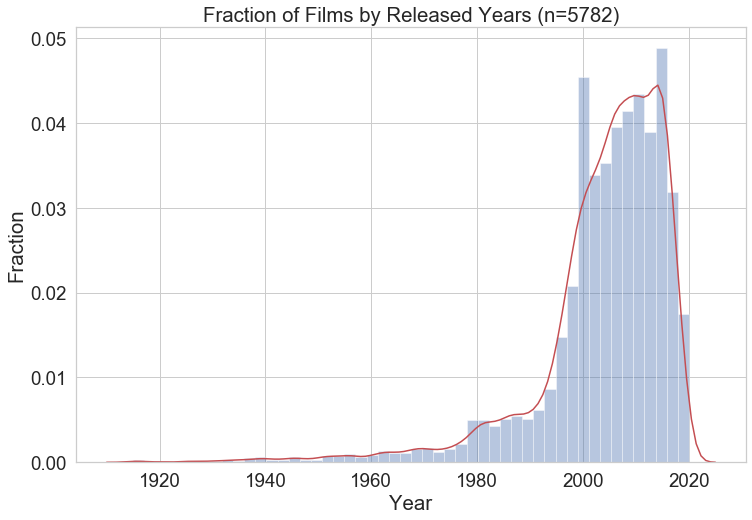

In [1039]:
# seaborn style settings
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
sns.distplot(df_movie_budgets['year'], ax=ax, 
             color='b',
             kde_kws={'color':'r'});
ax.set(xlabel='Year', ylabel='Fraction', 
       title=f'Fraction of Films by Released Years (n={len(df_movie_budgets)})');

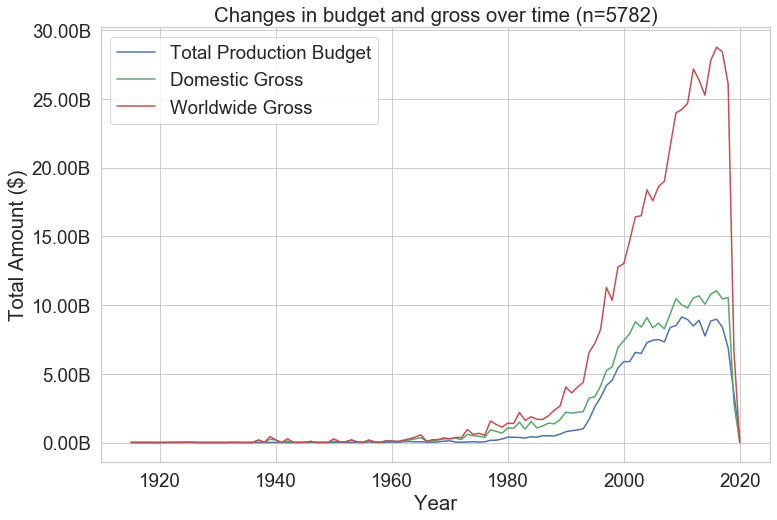

In [1045]:
# seaborn style settings
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
sns.lineplot(x='year', 
             y='production_budget',
             data=group_budgets,)
sns.lineplot(x='year', 
             y='domestic_gross',
             color='g',
             data=group_budgets)
sns.lineplot(x='year', 
             y='worldwide_gross',
             color='r',
             data=group_budgets)
ylabels = ['{:,.2f}'.format(x) + 'B' for x in ax.get_yticks()/1000000000];
ax.set_yticklabels(ylabels);
ax.set(title=f'Changes in budget and gross over time (n={len(df_movie_budgets)})',
       xlabel='Year',
       ylabel='Total Amount ($)');

ax.legend(loc='upper left', labels=['Total Production Budget', 'Domestic Gross', 'Worldwide Gross'])
# source code: https://stackoverflow.com/questions/45201514/edit-seaborn-legend/45211976

### Cleaning Data - Budget

In [69]:
def convert_budget_category(budget):
    if budget < 200000:
        return "Ultra Low"
    elif budget < 2000000:
        return "Low"
    elif budget < 50000000:
        return "Medium"
    elif budget < 100000000:
        return "Big"
    else:
        return "Mega"

In [14]:
def convert_release_date(data, col):
    data['month'] = data[col].apply(lambda x: x[:3])
    data['year'] = data[col].apply(lambda x: x[-4:]).astype('int64')

# converts currency to numeric values
def convert_currency_to_int(data, column):
    return data[column].apply(lambda x: x.replace('$',"")).apply(lambda x: x.replace(',',"")).astype('int64')

# converts multiple columns 
def convert_all_cur_to_int(data, cols):
    for col in cols:
        data[col] = convert_currency_to_int(data, col)

In [21]:
# # extracts released month and year
# convert_release_date(df_movie_budgets,'release_date')

# converts currency to int
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
# convert_all_cur_to_int(sample, cols)
convert_all_cur_to_int(df_movie_budgets, cols)

# categorize budget levels
df_movie_budgets['budget_level'] = df_movie_budgets['production_budget'].apply(lambda x: convert_budget_category(x))

# percent return
df_movie_budgets['dom_percent_return'] = df_movie_budgets['domestic_gross']/df_movie_budgets['production_budget']*100
df_movie_budgets['world_percent_return'] = df_movie_budgets['worldwide_gross']/df_movie_budgets['production_budget']*100
df_movie_budgets['world_to_dom'] = df_movie_budgets['worldwide_gross'] / df_movie_budgets['domestic_gross']

In [245]:
# Grouping budget info
group_budgets = df_movie_budgets.groupby('year').sum()
# df_movie_budgets.groupby('year').sum()['worldwide_gross']

group_budgets.reset_index(inplace=True)

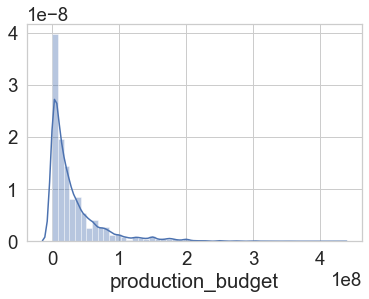

In [50]:
ax = sns.distplot(df_movie_budgets['production_budget'], )
## Useless
# sns.distplot(df_movie_budgets[df_movie_budgets['year']>=2000]['production_budget'])
# ## Useless
# sns.distplot(df_movie_budgets[df_movie_budgets['year']<2000]['production_budget'], )
# ax.set(xscale="log")

In [309]:
# fig, axs = plt.subplots(5,2, figsize=(12, 20), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
# axs = axs.ravel()
# year = list(range(1930,2011,10))
# for i in range(len(year)):
#     sns.distplot(df_movie_budgets[df_movie_budgets['year']>year[i]]['production_budget'], color='b', ax=axs[i])
#     ax2 = axs[i].twinx()
#     sns.distplot(df_movie_budgets[df_movie_budgets['year']<=year[i]]['production_budget'], ax=ax2, color='r')

In [24]:
# mean_budget_by_year = df_movie_budgets.groupby('year').mean()['production_budget']

In [26]:
# index = mean_budget_by_year.index >= 2000;

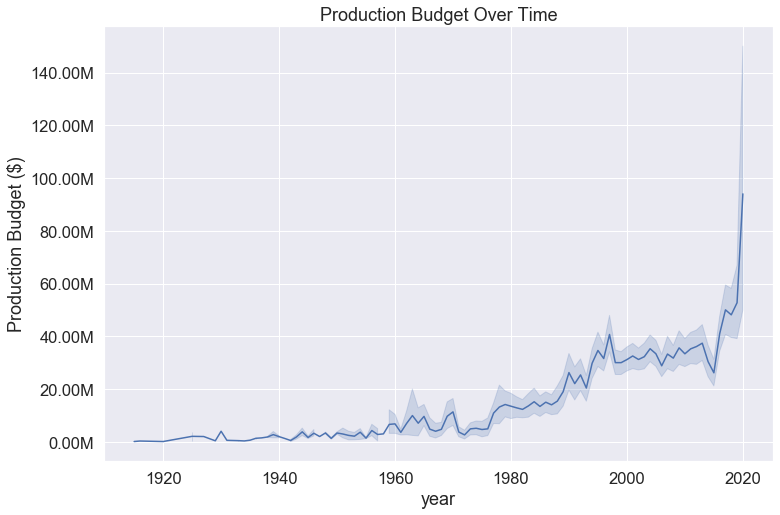

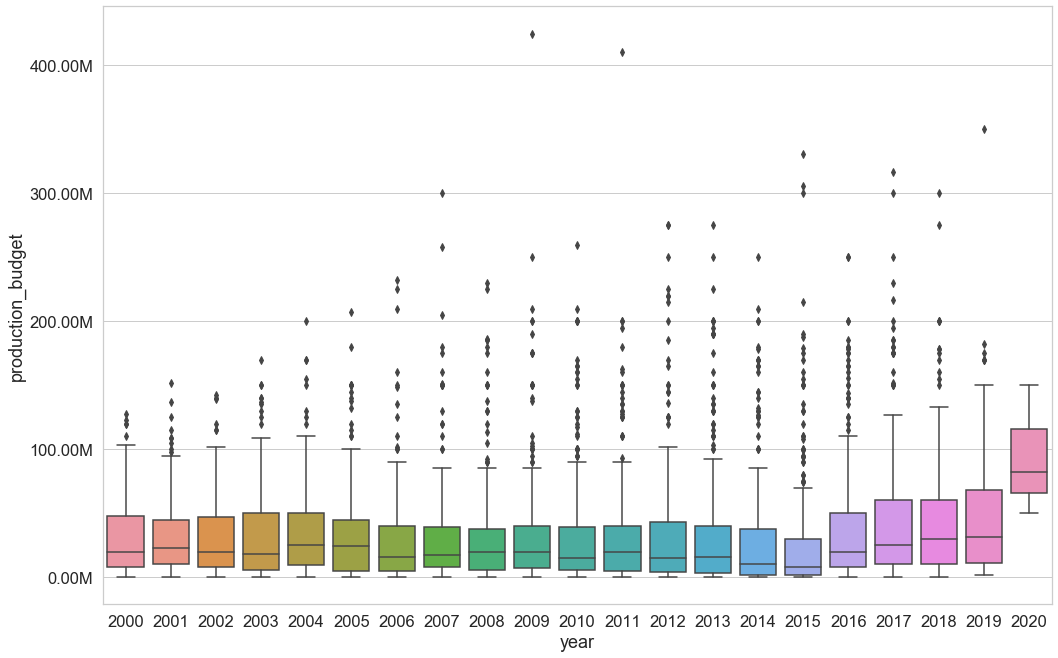

In [942]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
fig2 = sns.relplot(x="year", y="production_budget",
            kind="line", data=df_movie_budgets, ax=ax);

ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);
# Source code: https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi
ax.set(title = 'Production Budget Over Time', ylabel='Production Budget ($)');

fig, ax = plt.subplots(figsize=(17,11))
sns.set_style("whitegrid")
data = df_movie_budgets[df_movie_budgets['year']>=2000]
sns.boxplot(x="year", y="production_budget", data=data, ax=ax);
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);

plt.close(fig2.fig)

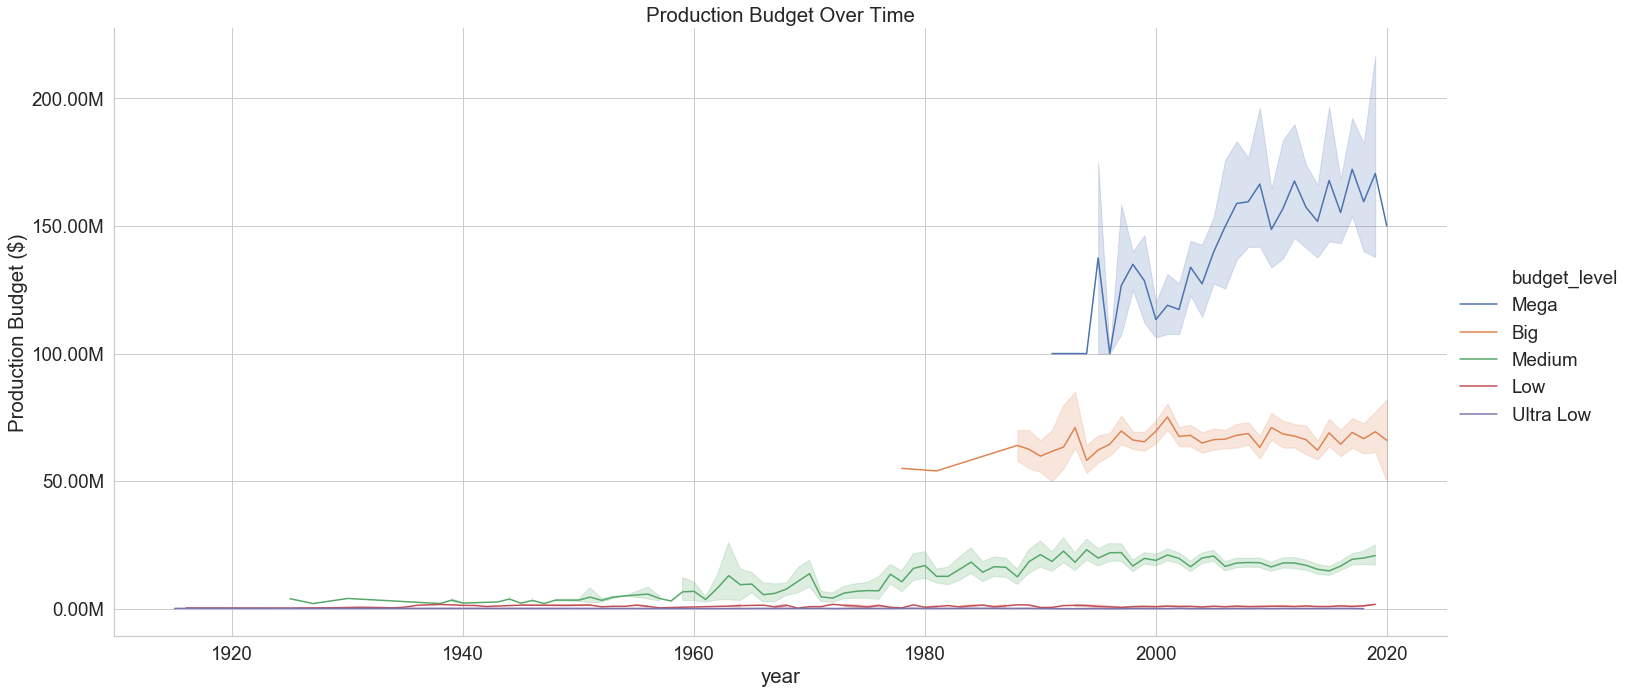

In [97]:
# fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
fig = sns.relplot(x="year", y="production_budget",
            kind="line", hue='budget_level', 
            data=df_movie_budgets,
            height=10, aspect=2);
ax = fig.ax
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);
# Source code: https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi
ax.set(title = 'Production Budget Over Time', ylabel='Production Budget ($)');



In [101]:
df_movie_budgets.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'month', 'year', 'budget_level'],
      dtype='object')

In [180]:
def break_even_percentage(data=df_movie_budgets, level='Mega', world=True):
    """
    data = df_movie_budgets
    level = one of the following: ['Mega', 'Big', 'Medium', 'Low', 'Ultra Low']
    world = True, if False then 'domestic percent return'
    """
    if world:
        return_type = 'world_percent_return'
    else:
        return_type = 'dom_percent_return'
        
    sample = data[data['budget_level'] == level]
    length = len(sample)
    
    over_even = np.sum(sample[return_type] > 100)
#     print(f'There are {length} data and {over_even} broke even.')
    return over_even/length*100

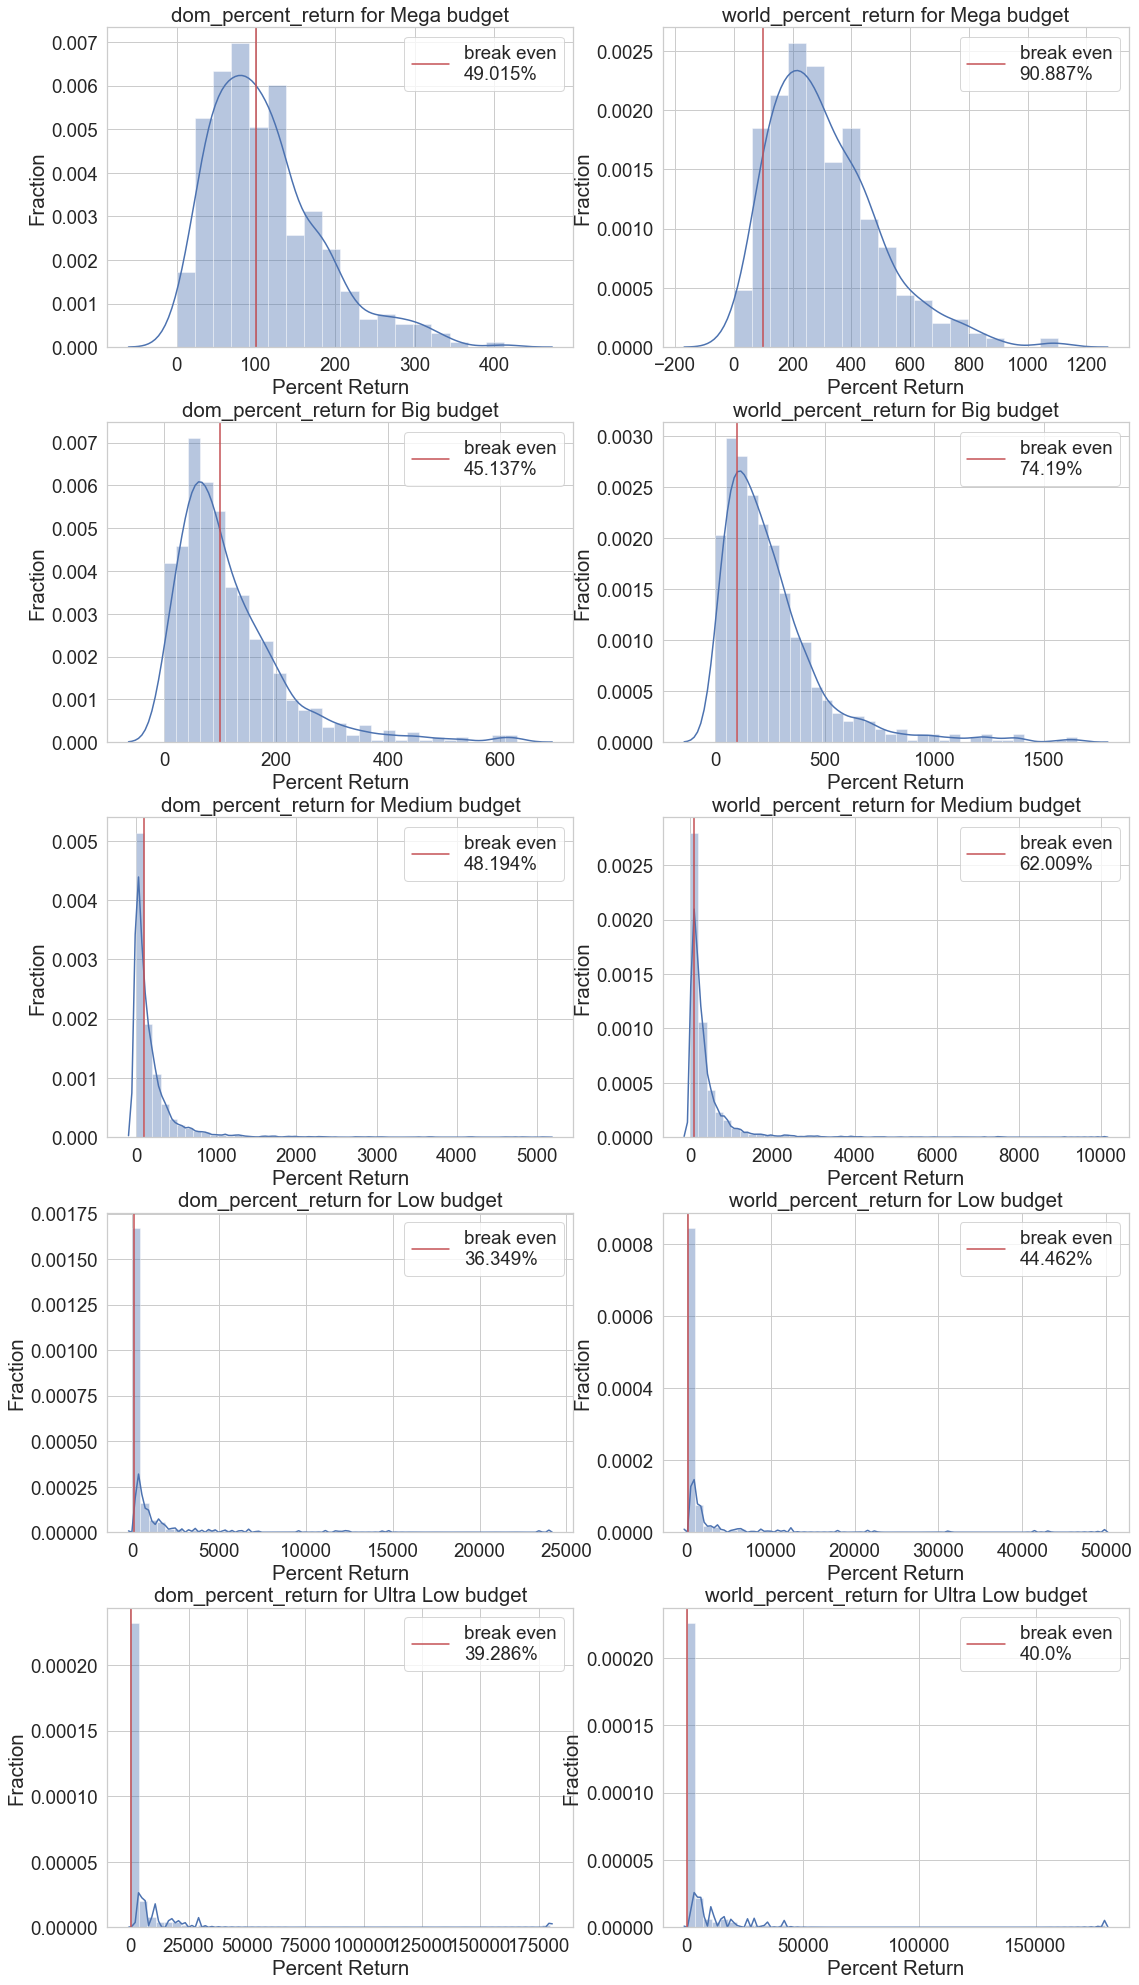

In [181]:
fig, axs = plt.subplots(5,2, figsize=(16,28))
fig.tight_layout(pad=2)
a = 0
for level in ['Mega', 'Big', 'Medium', 'Low', 'Ultra Low']:
    r = a//2
    for return_type in ['dom_percent_return', 'world_percent_return']:
        c = a%2
        ax = axs[r, c]
        fig = sns.distplot(df_movie_budgets[df_movie_budgets['budget_level']==level][return_type],
                  ax=ax)
        percent_over = round(break_even_percentage(df_movie_budgets, level, world=a%2),3)
        ax.axvline(100, color='r', label=f'break even\n{percent_over}%')
        ax.legend()
        ax.set(xlabel='Percent Return', ylabel='Fraction', title=f'{return_type} for {level} budget')
        a+=1


In [ ]:
fig, axs = plt.subplots(5,2, figsize=(16,28))
fig.tight_layout(pad=2)
a = 0
for level in ['Mega', 'Big', 'Medium', 'Low', 'Ultra Low']:
    r = a//2
    for return_type in ['dom_percent_return', 'world_percent_return']:
        c = a%2
        ax = axs[r, c]
        fig = sns.heatmap(df_movie_budgets[df_movie_budgets['budget_level']==level][return_type],
                  ax=ax)
        percent_over = round(break_even_percentage(df_movie_budgets, level, world=a%2),3)
        ax.axvline(100, color='r', label=f'break even\n{percent_over}%')
        ax.legend()
        ax.set(xlabel='Percent Return', ylabel='Fraction', title=f'{return_type} for {level} budget')
        a+=1


In [1049]:
df = df_movie_budgets.groupby(['year', 'month']).mean()['domestic_gross'].unstack()

### Cleaning Data - Timing

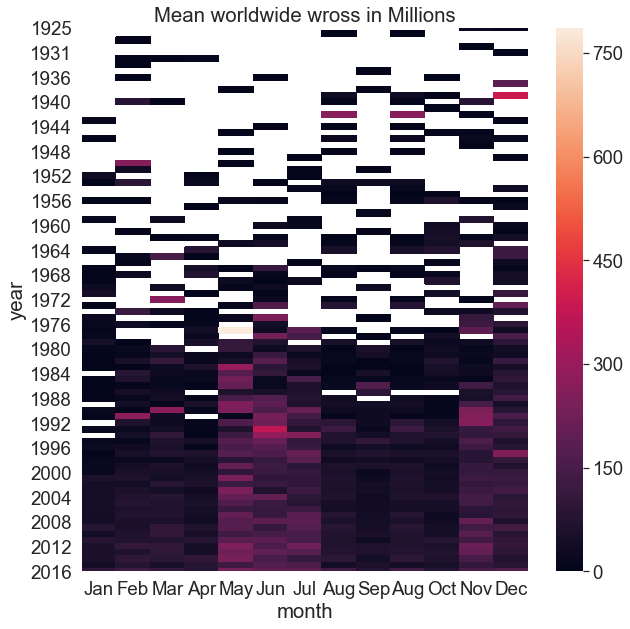

In [384]:
# Creates 2D year vs month and its mean worldwide gross value
time_gross = df_movie_budgets[(df_movie_budgets['year']>1920) & (df_movie_budgets['year']<2020)].groupby(['year', 'month']).mean().apply(lambda x: x/1000000)['worldwide_gross'].unstack()
# corrects month order
time_gross = time_gross[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Aug', 'Oct', 'Nov', 'Dec']]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(time_gross, ax=ax);
ax.set(title='Mean worldwide wross in Millions');

In [1096]:
#Counts the number of movies from 1980 to 2020
query ="""
SELECT COUNT(*)
FROM movieBudgets
WHERE year > 1980
AND year < 2020
AND domestic_gross NOT NULL
"""
count = pd.read_sql_query(query, conn)


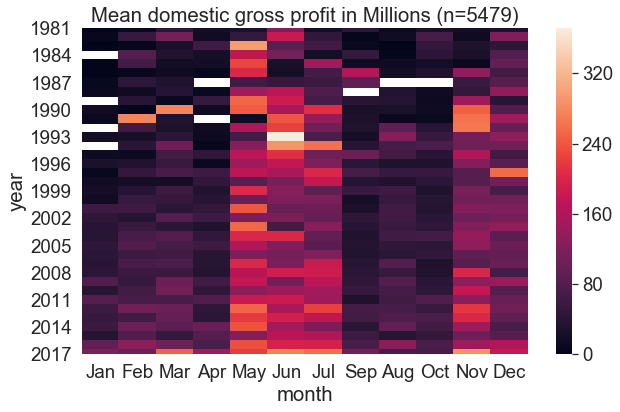

In [1106]:
# Creates 2D year vs month and its mean worldwide gross value
time_gross = df_movie_budgets[(df_movie_budgets['year']>1980) & (df_movie_budgets['year']<2020)].groupby(['year', 'month']).mean().apply(lambda x: x/1000000)['worldwide_gross'].unstack()
# corrects month order
time_gross = time_gross[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Sep', 'Aug', 'Oct', 'Nov', 'Dec']]
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(time_gross, ax=ax);
ax.set(title=f'Mean domestic gross profit in Millions (n={count.iloc[0,0]})');

In [1100]:
#Counts the number of movies from 1980 to 2020
query ="""
SELECT month, AVG(domestic_gross)
FROM movieBudgets
GROUP BY month
HAVING year > 1980
AND year < 2020
AND domestic_gross NOT NULL
"""
df_dom_gross_time = pd.read_sql_query(query, conn)
df_dom_gross_time

,month,AVG(domestic_gross)
0,Apr,2.732840e+07
1,Aug,3.216821e+07
2,Dec,4.610082e+07
3,Feb,3.541465e+07
4,Jan,2.394962e+07
5,Jul,6.072804e+07
6,Jun,6.582791e+07
7,Mar,3.857299e+07
8,May,6.669795e+07
9,Nov,5.818117e+07


In [1076]:
month_dict={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_dom_gross_time['index'] = df_dom_gross_time['month'].apply(lambda x: month_dict[x])

In [1105]:
#Counts the number of movies from 1980 to 2020
query ="""
SELECT month, domestic_gross
FROM movieBudgets
WHERE year > 1980
AND year < 2020
AND domestic_gross NOT NULL
"""
df_month_dom_gross = pd.read_sql_query(query, conn)
month_dict={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_month_dom_gross['index'] = df_month_dom_gross['month'].apply(lambda x: month_dict[x])
df_month_dom_gross

,month,domestic_gross,index
0,Dec,760507625,12
1,May,241063875,5
2,Jun,42762350,6
3,May,459005868,5
4,Dec,620181382,12
...,...,...,...
5474,Dec,0,12
5475,Apr,48482,4
5476,Jul,1338,7
5477,Sep,0,9


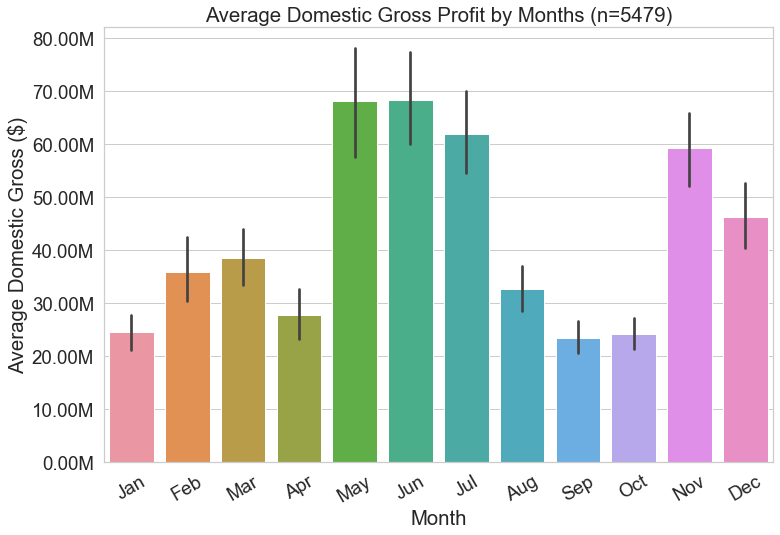

In [1107]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
sns.barplot(x='index',
        y='domestic_gross',
        data=df_month_dom_gross)
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];
ax.set_yticklabels(ylabels);
# ax.axvline(1, color='r', linewidth=5, linestyle='--', label='Break-even line')
ax.set(title=f'Average Domestic Gross Profit by Months (n={count.iloc[0, 0]})', 
       xlabel='Month',
       ylabel='Average Domestic Gross ($)')
ax.set_xticklabels( ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=30);

### Cleaning Data - Crew, titles, and budgets using SQLite3 and Pandas
So what do crews and percent return have in relationship?

In [686]:
query ="""
SELECT *
FROM titleCrew
"""
pd.read_sql_query(query, conn)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",None
146142,tt9004986,nm4993825,nm4993825


In [675]:
query ="""
SELECT *
FROM titleRatings
"""
pd.read_sql_query(query, conn)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [408]:
query ="""
SELECT tconst, primary_title as title, start_year as year, runtime_minutes as runtime, genres
FROM titleBasics
"""
pd.read_sql_query(query, conn).head()

,tconst,title,year,runtime,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [687]:
query ="""
SELECT nconst, primary_name as name, known_for_titles as titles
FROM nameBasics
"""

df_names = pd.read_sql_query(query, conn)

In [688]:
query ="""
SELECT movie as title, month, year, production_budget, worldwide_gross
FROM movieBudgets
"""
pd.read_sql_query(query, conn).head()

,title,month,year,production_budget,worldwide_gross
0,Avatar,Dec,2009,425000000,2776345279
1,Pirates of the Caribbean: On Stranger Tides,May,2011,410600000,1045663875
2,Dark Phoenix,Jun,2019,350000000,149762350
3,Avengers: Age of Ultron,May,2015,330600000,1403013963
4,Star Wars Ep. VIII: The Last Jedi,Dec,2017,317000000,1316721747


In [433]:
# query ="""
# SELECT primary_title as title, start_year as year,
#        runtime_minutes as runtime,
#        genres,
#        production_budget as budget,
#        domestic_gross,
#        worldwide_gross,
#        budget_level,
#        dom_percent_return,
#        world_percent_return
# FROM titleBasics as tB
# INNER JOIN movieBudgets as mB
# ON tB.primary_title = mB.movie
# """
# pd.read_sql_query(query, conn)

In [692]:
query ="""
SELECT primary_title as title, start_year as year,
       runtime_minutes as runtime,
       genres,
       tC.directors,
       tC.writers,
       production_budget as budget,
       domestic_gross,
       worldwide_gross,
       budget_level,
       dom_percent_return,
       world_percent_return,
       averagerating,
       numvotes
FROM titleBasics as tB
INNER JOIN movieBudgets as mB
ON tB.primary_title = mB.movie
LEFT JOIN titleCrew as tC
ON tB.tconst = tC.tconst
LEFT JOIN titleRatings as tR
ON tB.tconst = tR.tconst
"""
# Will be using this dataframe
df = pd.read_sql_query(query, conn)

In [857]:
df

,title,year,runtime,genres,directors,writers,budget,domestic_gross,worldwide_gross,budget_level,dom_percent_return,world_percent_return,averagerating,numvotes
0,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",[Lawrence Kasanoff],"[Lawrence Kasanoff, Joshua Wexler, Brent V. Fr...",45000000,0,73706,Medium,0.000000,0.163791,1.9,8248.0
1,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]",[Simon McQuoid],[Greg Russo],20000000,70433227,122133227,Medium,352.166135,610.666135,NaN,NaN
2,The Overnight,2010,88.0,None,[Jed I. Goodman],"[Kacey Arnold, Jed I. Goodman]",200000,1109808,1165996,Low,554.904000,582.998000,7.5,24.0
3,On the Road,2012,124.0,"[Adventure, Drama, Romance]",[Walter Salles],"[Jack Kerouac, Jose Rivera]",25000000,720828,9313302,Medium,2.883312,37.253208,6.1,37886.0
4,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",[Ben Stiller],"[Steve Conrad, James Thurber]",91000000,58236838,187861183,Big,63.996525,206.440860,7.3,275300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,Trapped,2016,NaN,None,None,None,30000000,6916869,6916869,Medium,23.056230,23.056230,NaN,NaN
3811,The Promise,2017,NaN,[Drama],[Edwine Dorival],"[Edwine Dorival, Mackenson Dorival]",90000000,8224288,10551417,Big,9.138098,11.723797,NaN,NaN
3812,Sublime,2019,NaN,[Documentary],[Bill Guttentag],"[Bill Guttentag, Nayeema Raza]",1800000,0,0,Low,0.000000,0.000000,NaN,NaN
3813,Columbus,2018,85.0,[Comedy],[Hatef Alimardani],[Hatef Alimardani],700000,1017107,1110511,Low,145.301000,158.644429,5.8,5.0


In [693]:
def find_name(nconst, name_ref = dict_names):
    """
    searches for names with given nconst.
    
    nconst = name constant
    name_ref = dict_names (dictionary with all nconst values with corresponding names)
    
    """
    if nconst == None:
        return None
    
    consts = nconst.split(',')
    names = []
    for const in consts:
        try:
            names.append(dict_names[const])
        except:
            names.append(None)
    return names

In [694]:
def genres_separator(genre):
    if genre == None:
        return None
    else:
        return genre.split(',')

In [695]:
# converting df_name into dictionary
dict_names = dict(zip(df_names.nconst,df_names.name))
#source code: https://stackoverflow.com/questions/17426292/what-is-the-most-efficient-way-to-create-a-dictionary-of-two-pandas-dataframe-co

# replaces all the nconst in directors into actual names if not none
df['directors'] = df['directors'].apply(lambda x: find_name(x, name_ref=dict_names))

# replaces all the nconst in writers into actual names if not none
df['writers'] = df['writers'].apply(lambda x: find_name(x, name_ref=dict_names))

# seperates genres into a list
df['genres'] = df['genres'].apply(lambda x: genres_separator(x)) 

### Analyzing Crew members
We will now analyze what crew members, namely directors and writers, should MS hire in order to maximize ratings and return of investment.

#### Directors

In [729]:
df_directors = df.explode('directors')

# Remove any movies without directors
df_directors = df_directors[~df_directors['directors'].isna()]


# Condense table
df_directors = df_directors[['year', 'directors', 'budget', 
                             'domestic_gross', 'worldwide_gross', 
                             'budget_level', 'dom_percent_return', 
                             'world_percent_return', 
                             'averagerating', 'numvotes']]

In [730]:
# Creates sql data
df_directors.to_sql('directors', if_exists='append', con = conn)

In [731]:
query ="""
SELECT directors, COUNT(*) as numFilms, SUM(budget) as total_spent, 
       SUM(domestic_gross) as total_dom, 
       SUM(worldwide_gross) as total_world,
       AVG(budget) as average_spent,
       AVG(domestic_gross) as average_dom,
       AVG(worldwide_gross) as average_world,
       CAST(AVG(domestic_gross) as FLOAT) / AVG(budget) as average_ROI_dom,
       CAST(AVG(worldwide_gross) as FLOAT) / AVG(budget) as average_ROI_world     
FROM directors AS d
GROUP BY directors
ORDER BY total_dom DESC
LIMIT 20
"""
df_directors_top = pd.read_sql_query(query, conn)

# query ="""
# SELECT directors, COUNT(*) as numFilms, SUM(budget) as total_spent, 
#        SUM(domestic_gross) as total_dom, 
#        SUM(worldwide_gross) as total_world,
#        AVG(budget) as average_spent,
#        AVG(domestic_gross) as average_dom,
#        AVG(worldwide_gross) as average_world,
#        CAST(AVG(domestic_gross) as FLOAT) / AVG(budget) as average_ROI_dom,
#        CAST(AVG(worldwide_gross) as FLOAT) / AVG(budget) as average_ROI_world     
# FROM (SELECT * FROM directors WHERE year >= 2000)
# GROUP BY directors
# ORDER BY total_dom DESC
# LIMIT 20
# """
# df_directors_top_new = pd.read_sql_query(query, conn)

In [732]:
def bar_graph(data, focus='directors', hue='average'):
    """
    Graphs horizontal bar graph of 'focus' and 'hue'.
    
    data = dataframe
    
    focus = {'directors', 'genres', 'writers'}
    
    hue = {'average', 'total', 'ROI'}
    
        """
    f, ax = plt.subplots(figsize=(12, 8))

    
    if hue != 'ROI':
        if hue != 'average':
            unit = '$'
        else:
            unit = '$/movie'
            
        sns.set_color_codes("pastel")
        sns.barplot(y=f"{focus}", x=f"{hue}_world", data=data,
                    label=f"{hue} world gross", color="b")
        # Plotting average dom gross
        sns.set_color_codes("muted")
        sns.barplot(y=f"{focus}", x=f"{hue}_dom", data=data,
                    label=f"{hue} domestic gross", color="b")
        # Plot average spent (budget)
        sns.set_color_codes("muted")
        sns.barplot(y=f"{focus}", x=f"{hue}_spent", data=data,
                    label=f"{hue} spent", color="r")

        # Add a legend and informative axis label
        ax.legend(ncol=1, loc="center right", frameon=True)
        xlabels = ['{:,.2f}'.format(x) + 'B' for x in ax.get_xticks()/1000000000];
        ax.set_xticklabels(xlabels);
        ax.set(title=f'{hue} money involved for each {focus}', 
               xlabel=f'{hue} money involved ({unit})')
        sns.despine(left=True, bottom=True)
    else:
        # Plot average spent (budget)
        sns.set_color_codes("pastel")
        sns.barplot(y=f"{focus}", x="average_ROI_world", data=data,
                    label="average world ROI", color="b")

        # Plot average world gross
        sns.set_color_codes("muted")
        sns.barplot(y=f"{focus}", x="average_ROI_dom", data=data,
                    label="average domestic ROI", color="b")


        # Add a legend and informative axis label
        ax.axvline(1, color='r', linewidth=5, linestyle='--', label='Break-even line')
        ax.legend(ncol=1, loc="lower right", frameon=True)
        ax.set(title=f'ROI involved for each {focus}', 
               xlabel='ROI')
        sns.despine(left=True, bottom=True)
    return ax

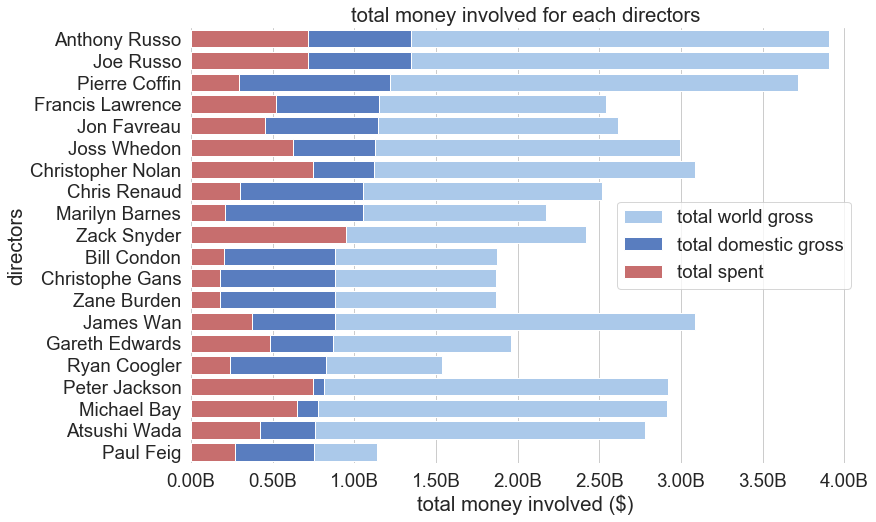

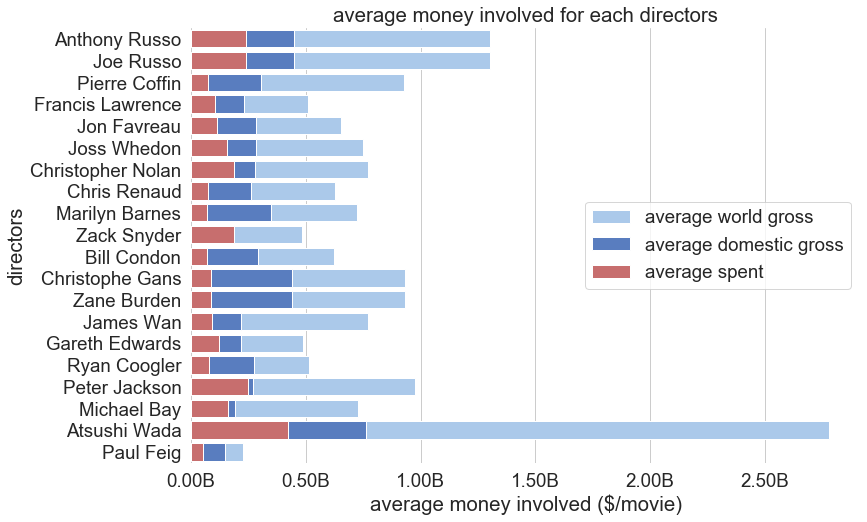

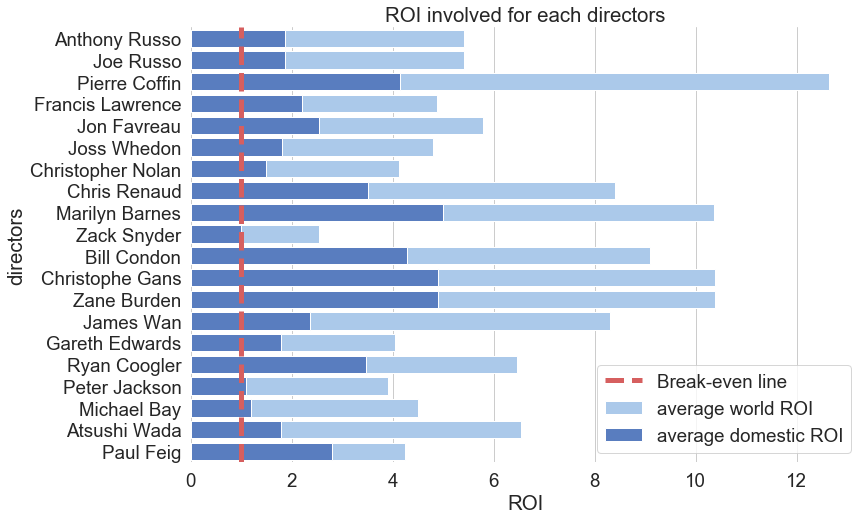

In [733]:
ax1 = bar_graph(data=df_directors_top, focus='directors', hue='total')

ax2 = bar_graph(data=df_directors_top, focus='directors', hue='average')

ax3 = bar_graph(data=df_directors_top, focus='directors', hue='ROI')

#### Writers

In [ ]:
df_writers = df.explode('writers')

# Remove any movies without writers
df_writers = df_writers[~df_writers['writers'].isna()]

# Condense table
df_writers = df_writers[['year', 'writers', 'budget', 'domestic_gross', 'worldwide_gross', 'budget_level', 'dom_percent_return', 'world_percent_return', 'averagerating', 'numvotes']]

df_writers

In [735]:
# Creates sql data
df_writers.to_sql('writers', if_exists='append', con = conn)

In [736]:
query ="""
SELECT writers, COUNT(*) as numFilms, SUM(budget) as total_spent, 
       SUM(domestic_gross) as total_dom, 
       SUM(worldwide_gross) as total_world,
       AVG(budget) as average_spent,
       AVG(domestic_gross) as average_dom,
       AVG(worldwide_gross) as average_world,
       CAST(AVG(domestic_gross) as FLOAT) / AVG(budget) as average_ROI_dom,
       CAST(AVG(worldwide_gross) as FLOAT) / AVG(budget) as average_ROI_world

FROM writers AS d
GROUP BY writers
ORDER BY total_dom DESC
LIMIT 20
"""
df_writers_top = pd.read_sql_query(query, conn)


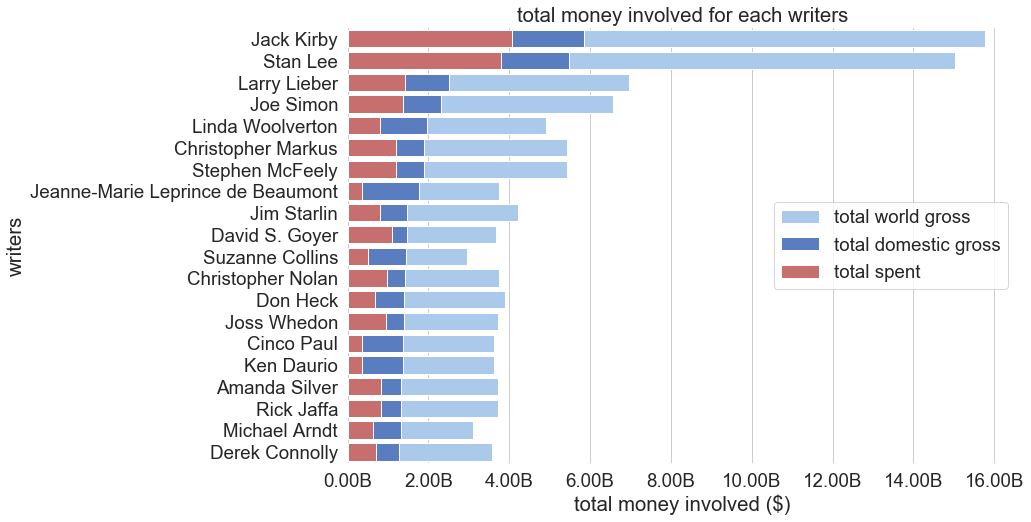

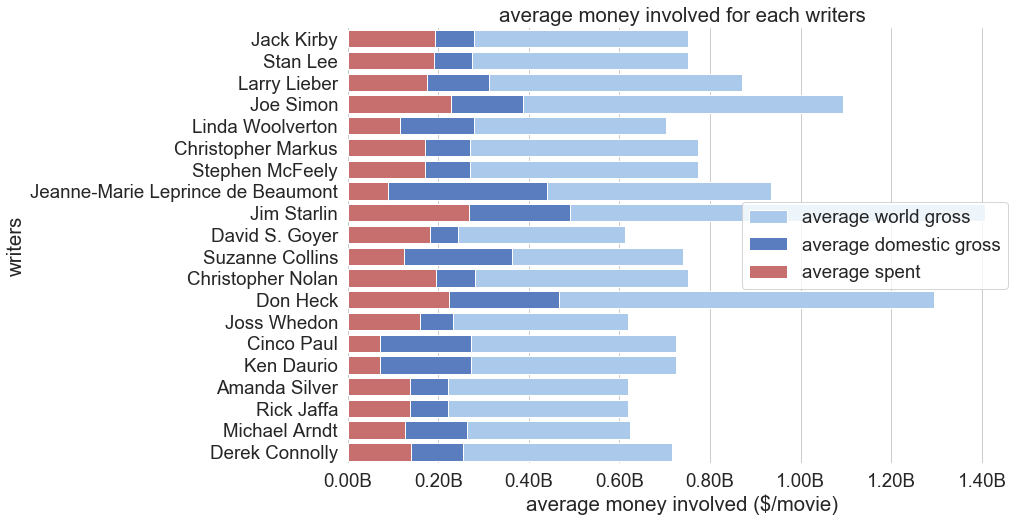

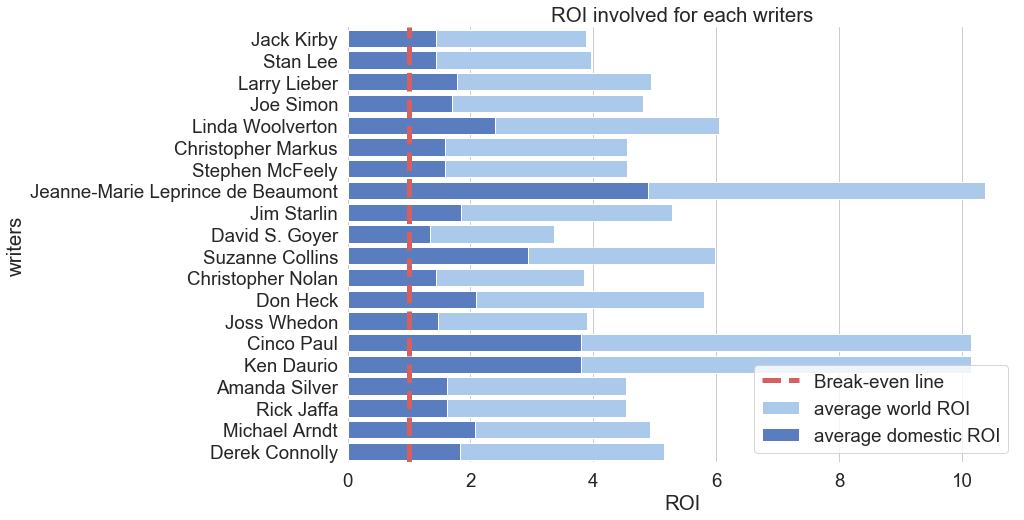

In [737]:
ax1 = bar_graph(data=df_writers_top, focus='writers', hue='total')

ax2 = bar_graph(data=df_writers_top, focus='writers', hue='average')

ax3 = bar_graph(data=df_writers_top, focus='writers', hue='ROI')

### Analyzing Genres

In [739]:
df_genres = df.explode('genres')

# Remove any movies without genres
df_genres = df_genres[~df_genres['genres'].isna()]


# Condense table
df_genres = df_genres[['year', 'genres', 'budget', 'domestic_gross', 'worldwide_gross', 'budget_level', 'dom_percent_return', 'world_percent_return', 'averagerating', 'numvotes']]

# Creates sql data
df_genres.to_sql('genres', if_exists='append', con = conn)


In [740]:
query ="""
SELECT genres, COUNT(*) as numFilms, SUM(budget) as total_spent, 
       SUM(domestic_gross) as total_dom, 
       SUM(worldwide_gross) as total_world,
       AVG(budget) as average_spent,
       AVG(domestic_gross) as average_dom,
       AVG(worldwide_gross) as average_world,
       CAST(AVG(domestic_gross) as FLOAT) / AVG(budget) as average_ROI_dom,
       CAST(AVG(worldwide_gross) as FLOAT) / AVG(budget) as average_ROI_world     
FROM genres AS d
GROUP BY genres
ORDER BY total_dom DESC
LIMIT 20
"""
df_genres_top = pd.read_sql_query(query, conn)


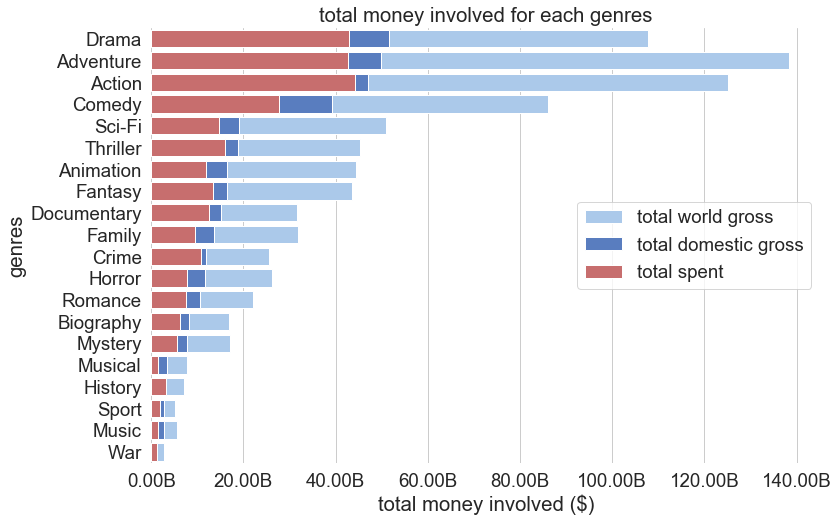

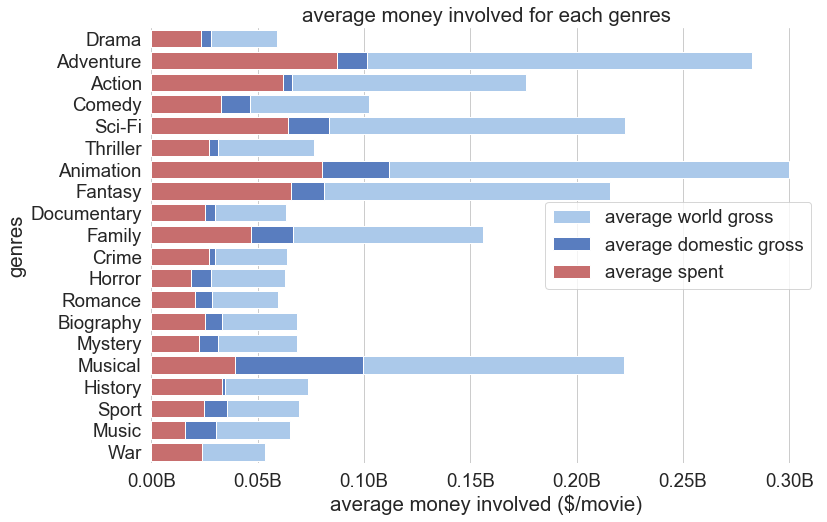

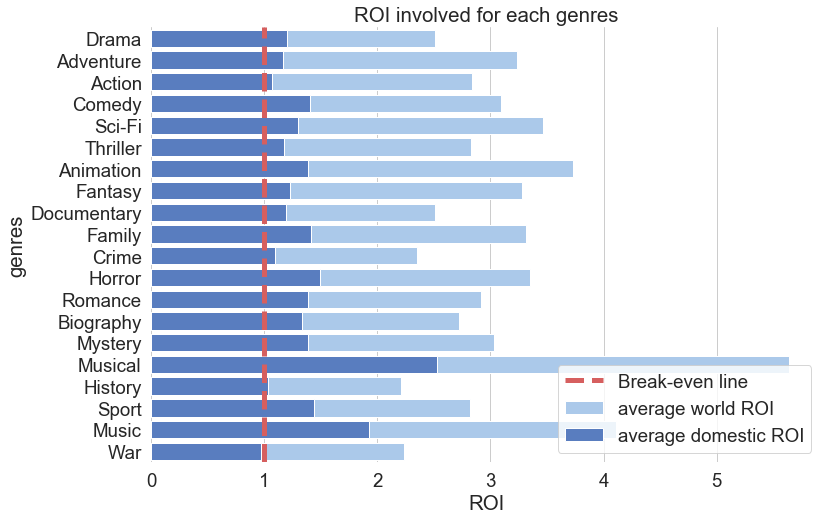

In [741]:
ax1 = bar_graph(data=df_genres_top, focus='genres', hue='total')

ax2 = bar_graph(data=df_genres_top, focus='genres', hue='average')

ax3 = bar_graph(data=df_genres_top, focus='genres', hue='ROI')

## What makes ratings higher?

### Rating vs. Production Budget

In [893]:
query ="""
SELECT averagerating,
       numvotes,
       budget,
       domestic_gross,
       worldwide_gross,
       year,
       budget_level
FROM writers
WHERE averagerating NOT NULL
AND domestic_gross != 0


"""
df_ratings = pd.read_sql_query(query, conn)


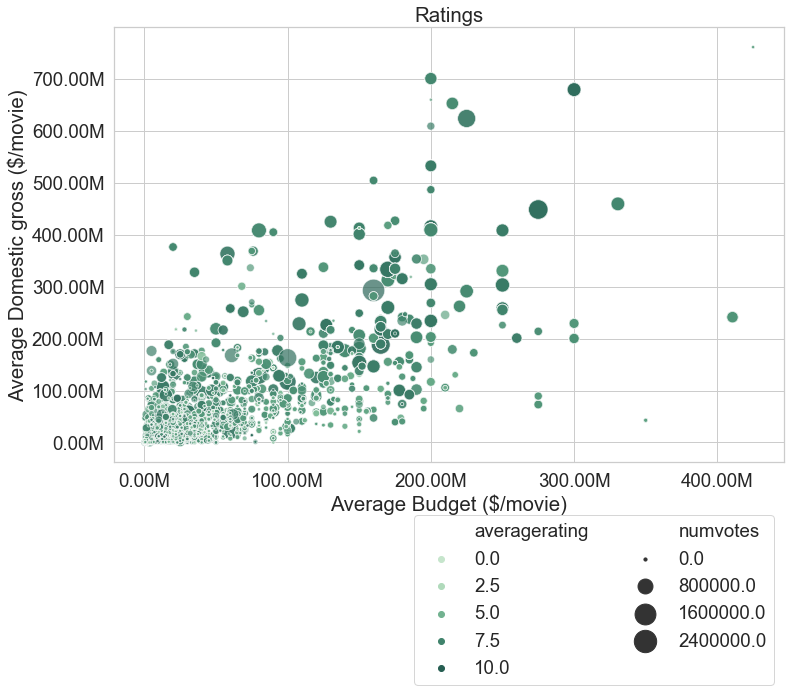

In [868]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
sns.scatterplot(x='budget', 
                y='domestic_gross', 
                size=df_ratings['numvotes'],
                sizes=(10,500),
                hue='averagerating',
                palette="ch:2.5,-.2,dark=.3",
                data=df_ratings,
                alpha=0.7)
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_xticks()/1000000];
ylabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_yticks()/1000000];

ax.set_xticklabels(xlabels);
ax.set_yticklabels(ylabels);
                   
ax.legend(loc='best', bbox_to_anchor=(1, -0.10), ncol=2)
ax.set(title='Ratings', ylabel='Average Domestic gross ($/movie)',
       xlabel='Average Budget ($/movie)');


[Text(54.080635839120376, 0.5, 'rating (out of 10)'),
 Text(0.5, 41.03200000000004, 'Average Budget ($/movie)'),
 Text(0.5, 1, 'Ratings')]

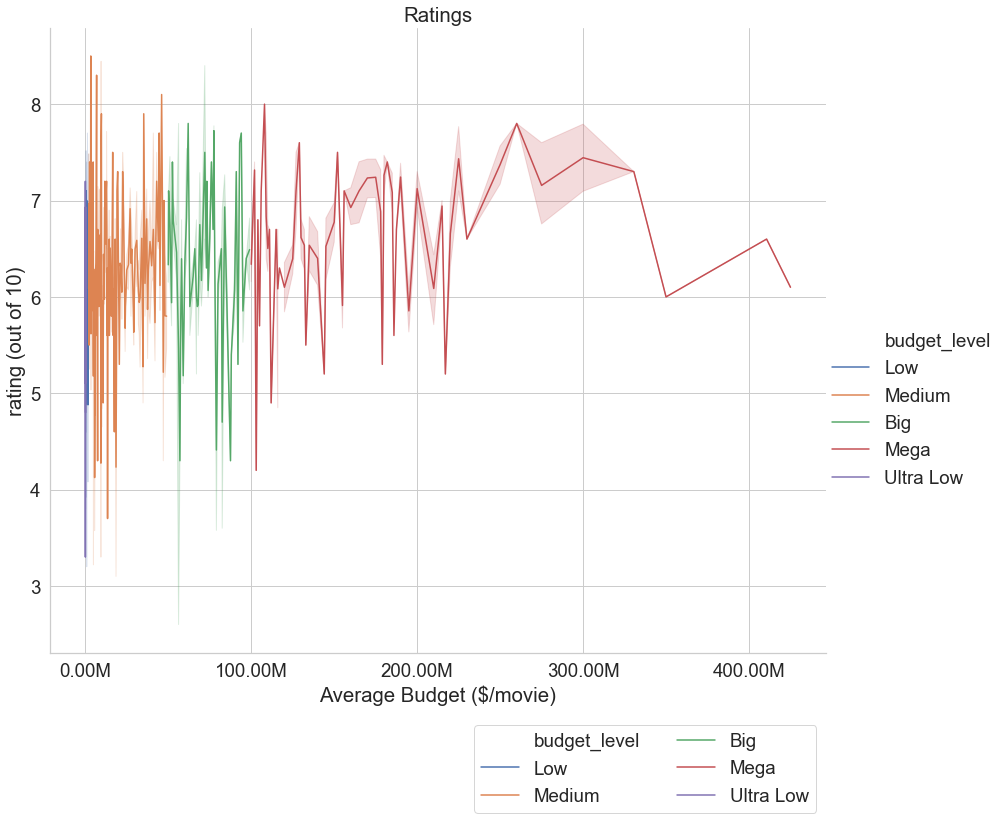

In [869]:
# fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
fig = sns.relplot(x='budget',
            y='averagerating',
            data=df_ratings,
            hue='budget_level',
            kind='line',
            height=10,
            aspect=1.2)
ax = fig.ax
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_xticks()/1000000];

ax.set_xticklabels(xlabels);
                   
ax.legend(loc='best', bbox_to_anchor=(1, -0.10), ncol=2)
ax.set(title='Ratings', ylabel='rating (out of 10)',
       xlabel='Average Budget ($/movie)')


You can see that depending on the budget level the spread (standard deviation) are very different. So I will try to make violing plots to see spread of average ratings depending on their budget level. Also let's add in error bars with confidence interval of at least 95% to visually see whether these average ratings might be significantly different.

In [894]:
# Changing budget level (categorical) to 'numerical' categorical so it arranges nicely
budget_level = {'Ultra Low': '0', 'Low':'1', 'Medium':'2', 'Big':'3', 'Mega':'4'}
df_ratings['budget_level'] = df_ratings['budget_level'].apply(lambda x: budget_level[x])

In [977]:
counts = []
means = []
for level in ['0', '1', '2', '3', '4']:
    counts.append(df_ratings.groupby('budget_level').get_group(level)['averagerating'].describe()['count'])
    means.append(round(df_ratings.groupby('budget_level').get_group(level)['averagerating'].describe()['mean'],2))

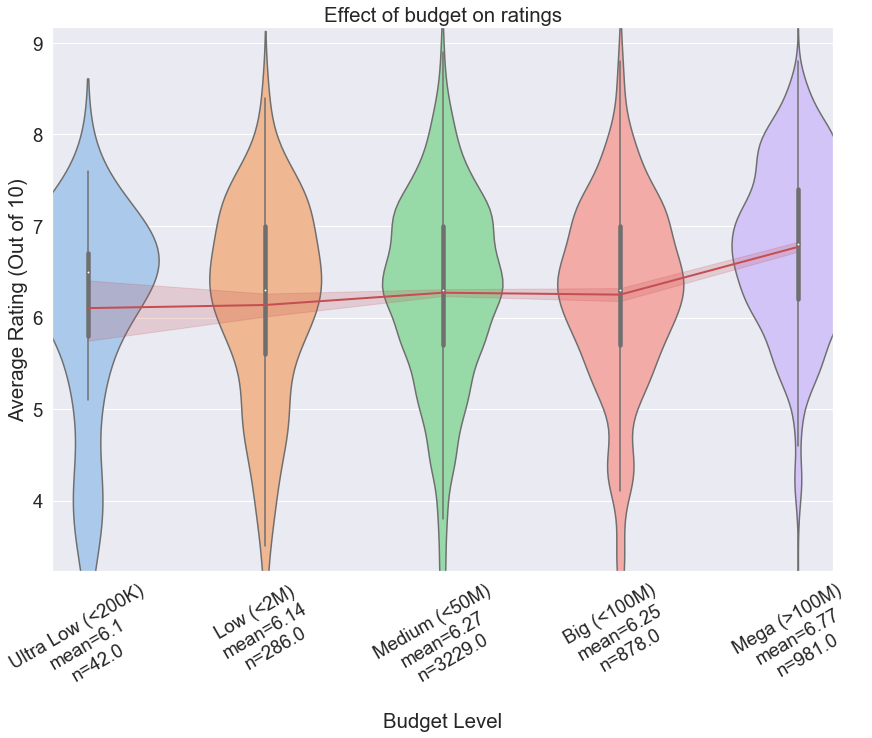

In [979]:
# fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(14,10))

sns.set(style="darkgrid", font_scale=1.7)
sns.violinplot(x='budget_level', 
               y='averagerating', 
               data=df_ratings, 
               ci=99,
               alpha=0.5, 
               ax=ax,
               palette="pastel")

fig2 = sns.relplot(x='budget_level', 
                   y='averagerating',
                   data=df_ratings, 
                   kind='line',
                   ci=95, 
                   ax=ax, 
                   color='r', 
                   linewidth=2,
                   palette='dark')
# Renaming the x-axis accordingto its budget 

ax.set_xticklabels([f'Ultra Low (<200K)\nmean={means[0]}\nn={counts[0]}', 
                    f'Low (<2M)\nmean={means[1]}\nn={counts[1]}', 
                    f'Medium (<50M)\nmean={means[2]}\nn={counts[2]}', 
                    f'Big (<100M)\nmean={means[3]}\nn={counts[3]}', 
                    f'Mega (>100M)\nmean={means[4]}\nn={counts[4]}'], 
                   rotation=30);
ax.set(title='Effect of budget on ratings', 
       ylabel='Average Rating (Out of 10)',
       xlabel='Budget Level')

plt.close(fig2.fig)


As you can see in the graphs above, higher the budget results in higher ratings significantly.

### Rating vs. top 20 writers in domestic gross

In [983]:
query ="""
SELECT writers,
       averagerating,
       numvotes,
       budget,
       domestic_gross,
       worldwide_gross
FROM writers
WHERE writers IN (SELECT writers
FROM writers
GROUP BY writers
ORDER BY SUM(domestic_gross) DESC
LIMIT 20) 
AND averagerating NOT NULL
"""
df_ratings_by_writers = pd.read_sql_query(query, conn)
df_ratings_by_writers

,writers,averagerating,numvotes,budget,domestic_gross,worldwide_gross
0,Rick Jaffa,7.0,539338.0,215000000,652270625,1648854864
1,Amanda Silver,7.0,539338.0,215000000,652270625,1648854864
2,Derek Connolly,7.0,539338.0,215000000,652270625,1648854864
3,Michael Arndt,8.3,682218.0,200000000,415004880,1068879522
4,Christopher Markus,6.9,668137.0,140000000,176654505,370569776
...,...,...,...,...,...,...
131,Stan Lee,7.1,244024.0,130000000,216648740,623144660
132,Larry Lieber,7.1,244024.0,130000000,216648740,623144660
133,Jack Kirby,7.1,244024.0,130000000,216648740,623144660
134,Jack Kirby,6.0,24451.0,350000000,42762350,149762350


In [1005]:
# gives order of writers with highest average ratings
groupedvalues = df_ratings_by_writers.groupby('writers').mean().sort_values(by='averagerating', ascending=False)['averagerating']
writer_order = list(groupedvalues.index)

# gives maximum average ratings
# max_rating

groupedvalues[0]
# for x,y in enumerate(groupedvalues):
#     print(x, y)

[Text(0, 0.5, 'Writer'),
 Text(0.5, 0, 'Average Rating (Out of 10)'),
 Text(0.5, 1.0, 'Average Ratings for Writers with Top 20 Domestic Gross')]

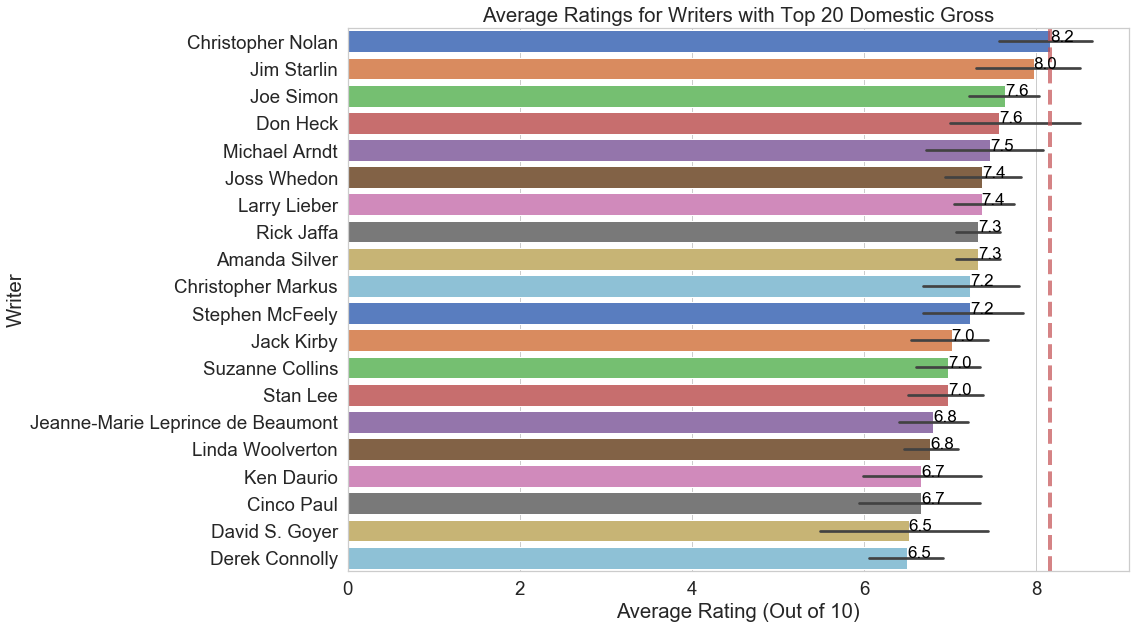

In [1038]:
fig, ax = plt.subplots(figsize=(14,10))

sns.set(style="whitegrid", font_scale=1.7)
fig = sns.barplot(x='averagerating', y='writers',
            data=df_ratings_by_writers, palette='muted',
            order=writer_order)

for writer, rating in enumerate(groupedvalues):
    fig.text(rating, writer, round(rating,1), color='black', 
             ha="left", 
             fontdict={'size':17})
    
ax.axvline(groupedvalues[0], color='r', linestyle='--', linewidth=4, alpha=0.7)

ax.set(title='Average Ratings for Writers with Top 20 Domestic Gross', 
       xlabel='Average Rating (Out of 10)', ylabel='Writer')
# Ref code: https://wellsr.com/python/seaborn-barplot-tutorial-for-python/#:~:text=If%20you%20want%20to%20display,have%20to%20do%20work%20around.&text=You%20can%20see%20that%20the,be%20stored%20in%20a%20variable.

### Rating vs. top 20 directors in domestic gross

In [1112]:
query ="""
SELECT directors,
       averagerating,
       numvotes,
       budget,
       domestic_gross,
       worldwide_gross
FROM directors
WHERE directors IN (SELECT directors
FROM directors
GROUP BY directors
ORDER BY SUM(domestic_gross) DESC
LIMIT 20) 
AND averagerating NOT NULL
"""
df_ratings_by_directors = pd.read_sql_query(query, conn)
df_ratings_by_directors

,directors,averagerating,numvotes,budget,domestic_gross,worldwide_gross
0,Zack Snyder,7.1,647288.0,225000000,291045518,667999518
1,Christopher Nolan,8.6,1299334.0,165000000,188017894,666379375
2,Gareth Edwards,6.4,350687.0,125000000,136314294,376000000
3,Gareth Edwards,6.4,350687.0,160000000,200676069,529076069
4,Joss Whedon,8.1,1183655.0,60000000,23385416,48585416
...,...,...,...,...,...,...
59,Anthony Russo,8.5,670926.0,300000000,678815482,2048134200
60,Joe Russo,8.5,670926.0,300000000,678815482,2048134200
61,Christopher Nolan,7.9,466580.0,150000000,190068280,499837368
62,Chris Renaud,6.6,3467.0,80000000,63795655,113351496


In [1115]:
# gives order of writers with highest average ratings
groupedvalues = df_ratings_by_directors.groupby('directors').mean().sort_values(by='averagerating', ascending=False)['averagerating']
director_order = list(groupedvalues.index)

# gives maximum average ratings
# max_rating

groupedvalues[0]


8.425

[Text(0, 0.5, 'Director'),
 Text(0.5, 0, 'Average rating (Out of 10)'),
 Text(0.5, 1.0, 'Average ratings for directors with Top 20 Domestic Gross')]

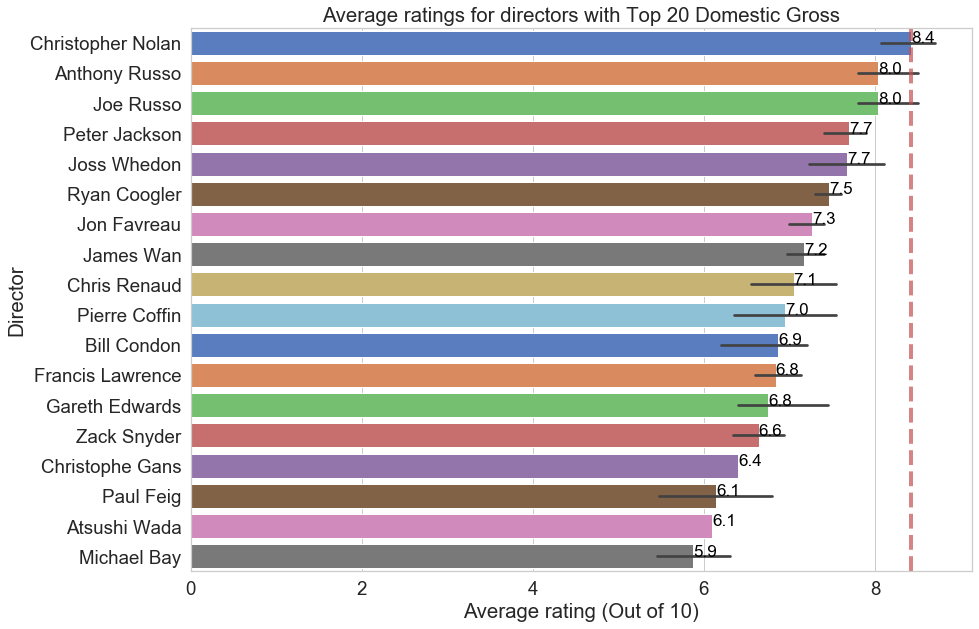

In [1116]:
fig, ax = plt.subplots(figsize=(14,10))

sns.set(style="whitegrid", font_scale=1.7)
fig = sns.barplot(x='averagerating', y='directors',
            data=df_ratings_by_directors, palette='muted',
            order=director_order)

for director, rating in enumerate(groupedvalues):
    fig.text(rating, director, round(rating,1), color='black', 
             ha="left", 
             fontdict={'size':17})
    
ax.axvline(groupedvalues[0], color='r', linestyle='--', linewidth=4, alpha=0.7)

ax.set(title='Average ratings for directors with Top 20 Domestic Gross', 
       xlabel='Average rating (Out of 10)', ylabel='Director')
# Ref code: https://wellsr.com/python/seaborn-barplot-tutorial-for-python/#:~:text=If%20you%20want%20to%20display,have%20to%20do%20work%20around.&text=You%20can%20see%20that%20the,be%20stored%20in%20a%20variable.

# Four Actionable Suggestions

## Action 1: Timeline
So at first, let's take a look for which month to release your future movies.

<img src='images/time_1.png'>

The heatmap above shows average domestic gross profits from 1980 to 2019 by months (Note that 2020 was omitted due to 1) covid-19 and 2) incomplete data). As you can see, regardless of the year, there are some clear evidence that movies that are released in summer (May-July) and winter (Nov-Dec) have higher average domestic gross profit.

<img src='images/time_2.png'>

The above bar graph of average domestic gross profit and we see that May-July and Nov have significantly higher average domestic gross profits.

```Suggestion: Aim for summer (May-July) or winter (Nov) to release any future movies.```

## Action 2: Budget

"A film production budget determines how much money will be spent on the entire film project. It involves the identification and estimation of cost items for each phase of filmmaking (development, pre-production, production, post-production and distribution)." - wikipedia



### Dividing budget into different levels

Due to a large range of production budgets, the films were categorized into the following depending on their production budget to reduce interference from outliers:
* Ultra-Low: < 200K USD
* Low: < 2M USD
* Medium: < 50M USD
* Big: < 100M USD
* Mega: > 100M USD
    

<img src='images/budget_1.png'>

The following can be observed from the graphs above:
* lower budget films have chance to get extremely high ROI (>1000%) but with lower chance of breaking even
* Mega budget films have the highest chance to break even domestically and worldwide
* International plays an important part making financial success in film industry

<img src='images/budget_rating_plot.png'>

## Action 3: Genre

## Action 4: Crews

# Conclusion

# Further Studies